In [1]:
# _EDA on Haberman cancer survival dataset:-_




In [2]:
## import necessary python libraries:-


In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
import os

In [4]:
### import dataset 

habermandata  = pd.read_csv("../input/haberman.csv/haberman.csv")
print(habermandata.shape) #shape gives info about rows and columns in dataset
print(habermandata.head())  #head() gives insights about some initial(top) rows nd columns of dataset
print(habermandata.tail()) #tail() gives insights about some last(bottom) rows nd columns of dataset
print(habermandata.info()) #info() gives  can display num of rows and columns, the total memory usage, data type of each column, and num of non-NaN ele
print(habermandata.size) # size gives total element in dataset, row*column

(305, 4)
   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1
     age  year  nodes  status
300   74    63      0       1
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1
304   78    65      1       2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     305 non-null    int64
 1   year    305 non-null    int64
 2   nodes   305 non-null    int64
 3   status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None
1220


In [5]:
print(habermandata.describe()) #describe() gives statistics of dataset

              age        year       nodes      status
count  305.000000  305.000000  305.000000  305.000000
mean    52.357377   62.868852    4.032787    1.262295
std     10.678010    3.242783    7.200528    0.440605
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.000000   66.000000    4.000000    2.000000
max     78.000000   69.000000   52.000000    2.000000


## Observations:-


- minimum age of patient is 30 and maximum age is 78
- average age of patients is around 52
- minimum positive axillary nodes detected is 0 and maximum is 52
- avg positive axillary nodes detected is 4 

In [6]:
print(habermandata.status.value_counts())


1    225
2     80
Name: status, dtype: int64


### Here survival can be classified as


1. = patient survived >=5 year
2. = patient died within 5 year

## Observations:-


- survived = 225 patients, so more patients survived(73% approx) than died 
- not survived = 80 patients, 80 patients died within 5 year

# univariate analysis(PDF,CDF,box plot,violin plot)

## univariate analysis on year

[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.20327869 0.09180328 0.0852459  0.07540984 0.09836066 0.10163934
 0.09180328 0.09180328 0.08196721 0.07868852]
[0.20327869 0.29508197 0.38032787 0.4557377  0.55409836 0.6557377
 0.74754098 0.83934426 0.92131148 1.        ]


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


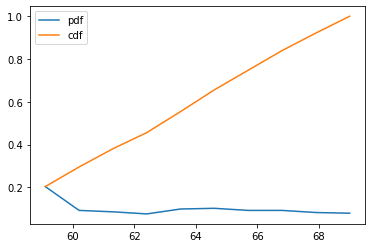

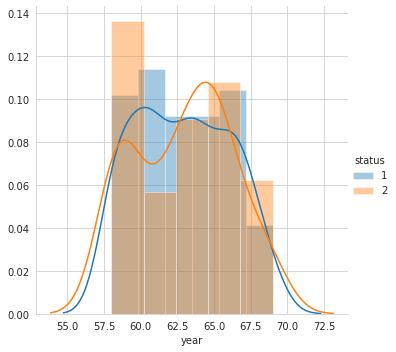

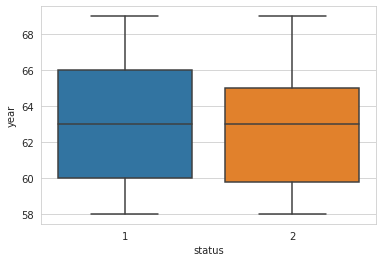

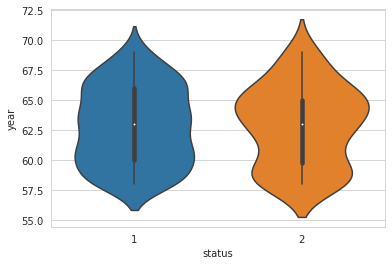

In [7]:
counts,bin_edges=np.histogram(habermandata['year'],bins=10,density=True)
print(bin_edges)
pdf=counts/sum(counts)
print(pdf)
cdf=np.cumsum(pdf) #cdf is cumulative sum of pdf just like integration of pdf is cdf
print(cdf)

plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.legend()
sns.set_style('whitegrid')
sns.FacetGrid(habermandata,hue='status',height=5).map(sns.distplot,'year').add_legend()
plt.show()
#hue created on any feature which we want output 

plt.figure(2)
sns.boxplot(data=habermandata,y='year',x='status')

plt.figure(3)
sns.violinplot(data=habermandata,y='year',x='status',size=8)
plt.show()

## observations:-

- mostly patients tested  in year 62.5 to 67 not survived 
- most patient survived tested between 60 to 62.5 
- mostly patients tested  in year 58 to 60 not survived
- from box plot and violin plot huge overlapping so no insights can be drawn

## univariate analysis on age

[30.  34.8 39.6 44.4 49.2 54.  58.8 63.6 68.4 73.2 78. ]
[0.04590164 0.0852459  0.13114754 0.1442623  0.14098361 0.15737705
 0.12459016 0.09180328 0.05901639 0.01967213]
[0.04590164 0.13114754 0.26229508 0.40655738 0.54754098 0.70491803
 0.8295082  0.92131148 0.98032787 1.        ]


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


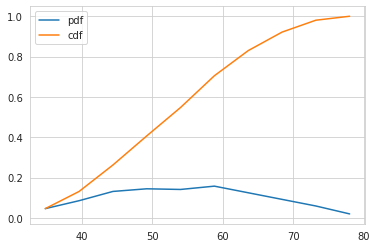

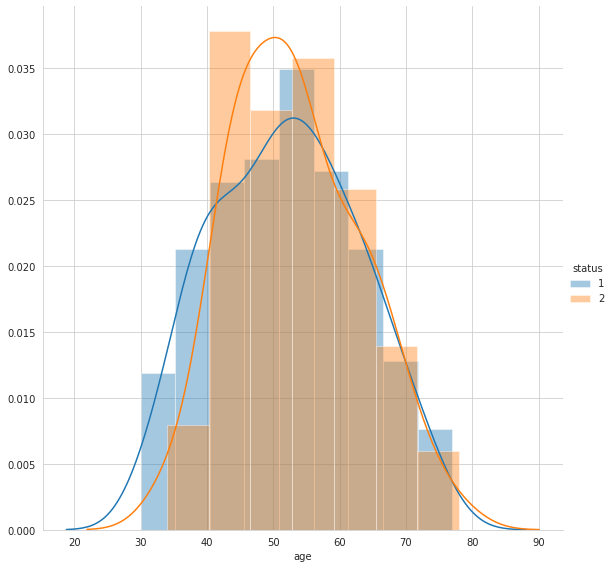

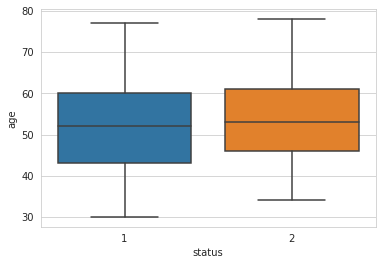

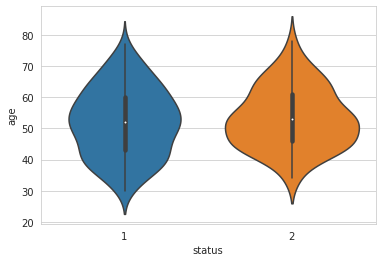

In [8]:
counts,bin_edges=np.histogram(habermandata['age'],bins=10,density=True)
print(bin_edges)
pdf=counts/sum(counts)
print(pdf)
cdf=np.cumsum(pdf) #cdf is cumulative sum of pdf just like integration of pdf is cdf
print(cdf)

plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.legend()
sns.set_style('whitegrid')
sns.FacetGrid(habermandata,hue='status',height=8).map(sns.distplot,'age').add_legend()
plt.show()
plt.figure(2)
sns.boxplot(data=habermandata,y='age',x='status')

plt.figure(3)
sns.violinplot(data=habermandata,y='age',x='status',size=5)
plt.show()



## observations:-

- most patient with age below 40 survived 
- few patients survived  between 40 to 70 age  
- from box plot and violin plot huge overlapping so no insights can be drawn

## univariate analysis on nodes

[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.7704918  0.09836066 0.05901639 0.02622951 0.0295082  0.00655738
 0.00327869 0.         0.00327869 0.00327869]
[0.7704918  0.86885246 0.92786885 0.95409836 0.98360656 0.99016393
 0.99344262 0.99344262 0.99672131 1.        ]


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


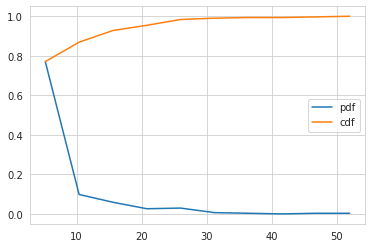

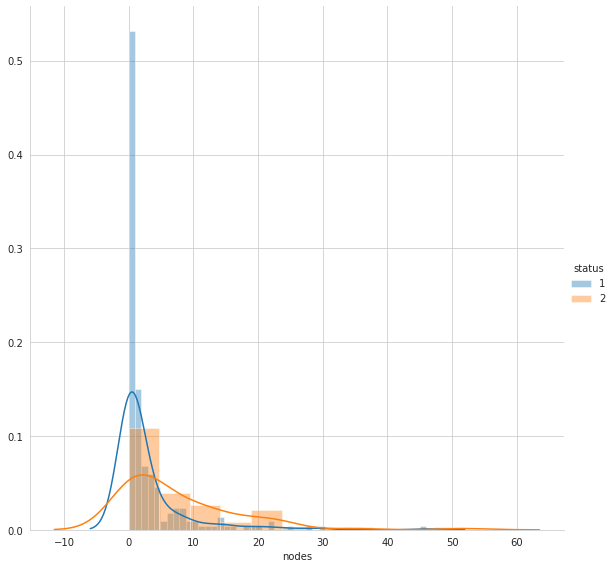

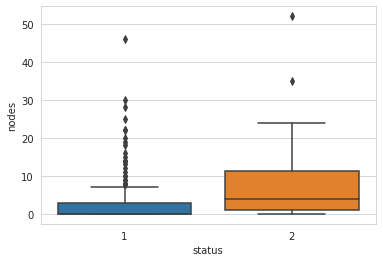

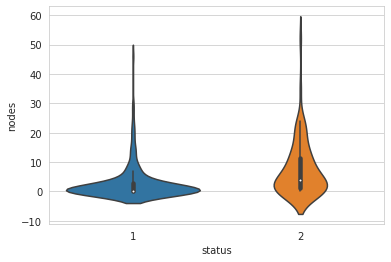

In [9]:
counts,bin_edges=np.histogram(habermandata['nodes'],bins=10,density=True)
print(bin_edges)
pdf=counts/sum(counts)
print(pdf)
cdf=np.cumsum(pdf) #cdf is cumulative sum of pdf just like integration of pdf is cdf
print(cdf)

plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.legend()
sns.set_style('whitegrid')
sns.FacetGrid(habermandata,hue='status',height=8).map(sns.distplot,'nodes').add_legend()
plt.show()
plt.figure(2)
sns.boxplot(data=habermandata,y='nodes',x='status')

plt.figure(3)
sns.violinplot(data=habermandata,y='nodes',x='status',size=5)
plt.show()


## observations:-

- by analysing box plot patients survived has 0 nodes
- by analysing box plot & pdf cdf  patients with nodes more than 2 has less chances of survival

# Bivariate analysis(pair plot,scatter plot)

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


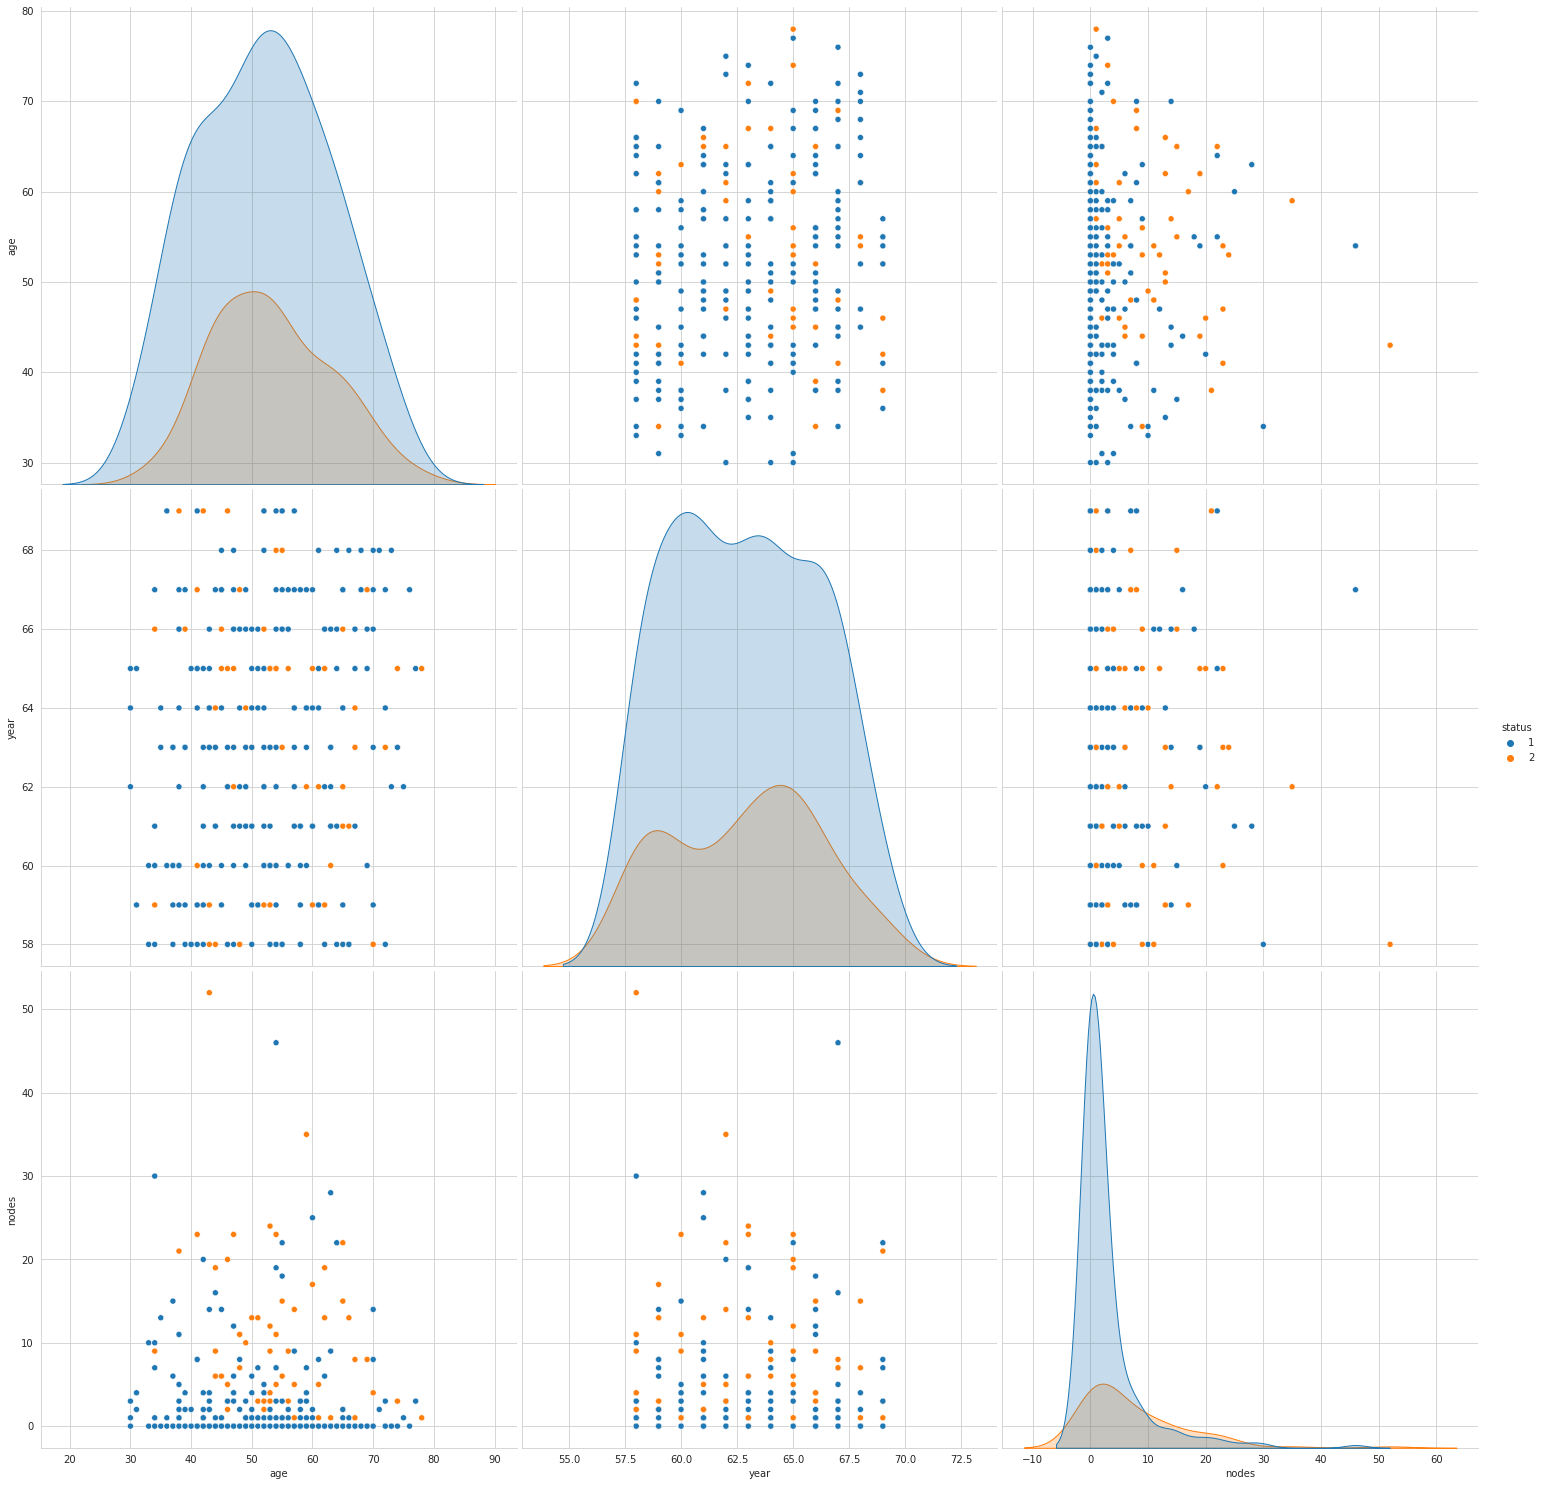

In [10]:
#pairplot
habermandata.status=habermandata.status.astype('str')
sns.set_style("whitegrid");
sns.pairplot(habermandata, hue="status",size=7);
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


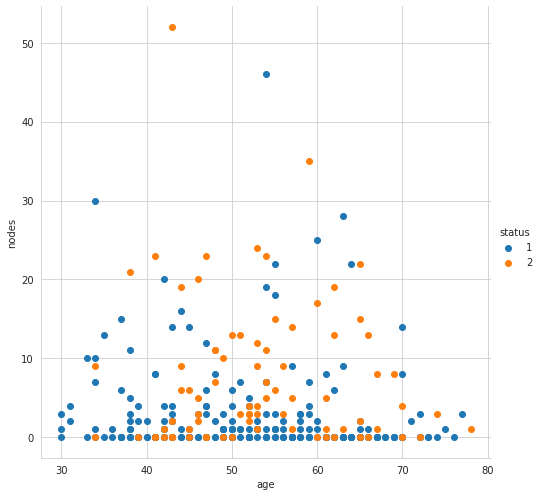

In [11]:
#scatter plot bw age and nodes
sns.set_style("whitegrid");
sns.FacetGrid(habermandata, hue="status", size=7) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.show();

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


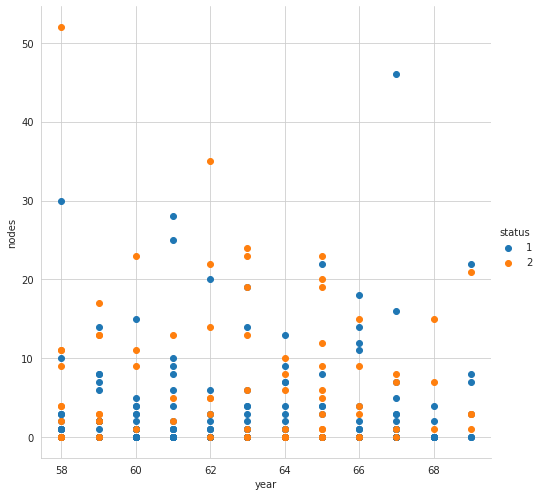

In [12]:
#scatter plot bw year and nodes
sns.set_style("whitegrid");
sns.FacetGrid(habermandata, hue="status", size=7) \
   .map(plt.scatter, "year", "nodes") \
   .add_legend();
plt.show();

## observations:-

- from both pair plot and scatter plot we can clearly & easily summarize what we have summarized in univariate analysis

## conclusion:-

- patients with  nodes less than 2 has survived
- most patients below 35 age has survived
- use both bivariate and univariate analysis for more clarity and decision making 